In [1]:
import os, re 
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline

In [13]:
def get_results_dir(model_name, dataset_name, model_type, fault_type):
    d = {
        'vgg16': {
            'cifar10': {
                'full': {
                    'faults': './logs/vgg16/cifar10/faults',
                    'zero_bit_masking':  './logs/vgg16/cifar10/zero_bit_masking',
                },
                'prune': {
                    'faults': './logs/vgg16/cifar10/prune/scratchB/faults',
                    'zero_bit_masking': './logs/vgg16/cifar10/prune/scratchB/zero_bit_masking',
                }
            }
        },
         'resnet56': {
            'cifar10': {
                'full': {
                    'faults': './logs/resnet56/cifar10/faults',
                    'zero_bit_masking':  './logs/resnet56/cifar10/zero_bit_masking',
                },
                'pruneA': {
                    'faults': './logs/resnet56/cifar10/pruneA/scratchB/faults',
                    'zero_bit_masking': './logs/resnet56/cifar10/pruneA/scratchB/zero_bit_masking',
                },
                'pruneB': {
                    'faults': './logs/resnet56/cifar10/pruneB/scratchB/faults',
                    'zero_bit_masking': './logs/resnet56/cifar10/pruneB/scratchB/zero_bit_masking',
                }
                
            }
        }
        
    }
    return d[model_name][dataset_name][model_type][fault_type]



model_name = 'resnet56'
dataset_name = 'cifar10'

model_types = ['full', 'pruneA', 'pruneB']
fault_types = ['faults', 'zero_bit_masking']
# fault_types = ['faults']


In [14]:
def parse_log(log_path):
    # result = {trial_id: [#flipped_bits, #changed_params, test_accuracy]}
    result = {}
    with open(log_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            line = line.strip()
            if line:
                flipped_bits, changed_params, test_accuracy = 0, 0, None 
                items = line.split(',')
                for item in items:
                    if 'flipped_bits' in item:
                        flipped_bits = int(item.split()[1])
                    if 'changed_params' in item:
                        changed_params = int(item.split()[1])
                    if 'test_accuracy' in item:
                        test_accuracy = float(item.split()[1])
                    if 'trial' in item:
                        trial = int(item.split()[1])
                if test_accuracy:
                    result[trial] = [flipped_bits, changed_params, test_accuracy]
    result = [result[trial_id] for trial_id in sorted(result.keys())]
    return result 

def load_results(model_type, fault_type):
    # results = {fault_rate: trial_id: [#flipped bits, # changed_params, test_accuracy]}
    results = {}
    results_dir = get_results_dir(model_name, dataset_name, model_type, fault_type)
    fault_rates_folders = os.listdir(results_dir)
    for folder in fault_rates_folders:
        # each folder has a log.txt file and a folder that contains the stats
        log_path = os.path.join(results_dir, folder, 'logs.txt')
        log_result = parse_log(log_path)
        fault_rate = float(folder)
        results[fault_rate] = log_result
#         print fault_rate, log_result 
    return results 

data = {} # model_type -> fault_type -> fault_rate -> trial_id 
for model_type in model_types:
    data[model_type] = {} 
    for fault_type in fault_types:
        results = load_results(model_type, fault_type)
        data[model_type][fault_type] = results 
        
print('full, faults:', data['full']['faults'][5e-8])
print('prune, faults:', data['pruneA']['faults'][5e-8])

print('full, zero_bit_masking:', data['full']['zero_bit_masking'][5e-8])
print('prune, zero_bit_masking:', data['pruneA']['zero_bit_masking'][5e-8])

full, faults: [[2, 2, 0.9268], [1, 1, 0.9269], [1, 1, 0.9269], [4, 4, 0.9269], [1, 1, 0.9269], [3, 3, 0.9268], [0, 0, 0.9269], [3, 3, 0.9268], [1, 1, 0.9269], [2, 2, 0.9262], [1, 1, 0.9269], [1, 1, 0.9269], [3, 3, 0.9268], [2, 2, 0.9269], [1, 1, 0.9269], [0, 0, 0.9269], [2, 2, 0.9269], [1, 1, 0.9269], [1, 1, 0.9269], [2, 2, 0.9269]]
prune, faults: [[2, 2, 0.9329], [1, 1, 0.9331], [1, 1, 0.9331], [4, 4, 0.9331], [1, 1, 0.9331], [2, 2, 0.9331], [0, 0, 0.9331], [3, 3, 0.9331], [0, 0, 0.9331], [1, 1, 0.9331], [1, 1, 0.933], [1, 1, 0.9331], [3, 3, 0.9331], [2, 2, 0.9331], [1, 1, 0.9331], [0, 0, 0.9331], [2, 2, 0.9331], [1, 1, 0.9331], [1, 1, 0.9331], [2, 2, 0.9331]]
full, zero_bit_masking: [[2, 2, 0.9268], [1, 1, 0.9269], [1, 1, 0.9269], [4, 4, 0.9269], [1, 1, 0.9269], [3, 3, 0.9268], [0, 0, 0.9269], [3, 3, 0.9268], [1, 1, 0.9269], [2, 2, 0.9269], [1, 1, 0.9269], [1, 1, 0.9269], [3, 3, 0.9269], [2, 2, 0.9269], [1, 1, 0.9269], [0, 0, 0.9269], [2, 2, 0.9269], [1, 1, 0.9269], [1, 1, 0.9269], [

common_fault_rates 9 [1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001]
faults_results_list.shape: (3, 9, 20, 3)
full: [0.926895 0.926845 0.92683  0.765875 0.641435 0.225505 0.10206  0.1
 0.1     ]
prune: [0.9331   0.933085 0.933065 0.848135 0.765975 0.310175 0.143025 0.1
 0.1     ]


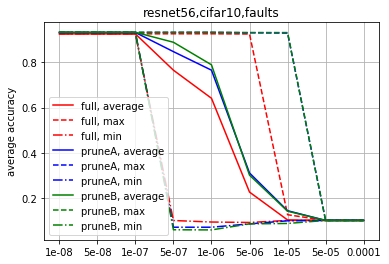

common_fault_rates 9 [1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001]
faults_results_list.shape: (3, 9, 20, 3)
full: [0.926895 0.926885 0.92688  0.926845 0.926795 0.92676  0.926525 0.92598
 0.924445]
prune: [0.9331   0.93309  0.93307  0.933095 0.93313  0.933185 0.93301  0.932485
 0.93047 ]


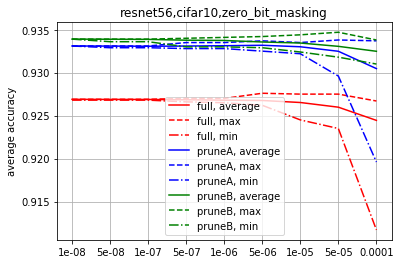

In [15]:
# compare full faults and prune faults results
for fault_type in fault_types:
    common_fault_rates = sorted(set(data['full'][fault_type].keys()).intersection(data['pruneA'][fault_type].keys()))
    print('common_fault_rates', len(common_fault_rates), common_fault_rates)

    # get the accuracy results
    faults_results_list = [] 
    for model_type in model_types:
        faults_results =  data[model_type][fault_type]
        faults_results_list.append([faults_results[fault_rate] for fault_rate in common_fault_rates])
    faults_results_list = np.asarray(faults_results_list)
    print('faults_results_list.shape:', faults_results_list.shape)


    averaged = np.average(faults_results_list, axis=2)
    mins = np.min(faults_results_list, axis=2)
    maxs = np.max(faults_results_list, axis=2)
    print('full:', averaged[0, :, 2])
    print('prune:', averaged[1, :, 2])

    x = range(len(common_fault_rates))
    colors = ['r', 'b', 'g']
    linestyles = ['-', '--', '-.']
    for i, model_type in enumerate(model_types):
        plt.plot(x, averaged[i, :, 2], linestyle=linestyles[0], color=colors[i], label=model_type+', average')
        plt.plot(x, maxs[i, :, 2],  linestyle=linestyles[1], color=colors[i], label=model_type + ', max')
        plt.plot(x, mins[i, :, 2], linestyle=linestyles[2], color = colors[i], label=model_type +', min')

    plt.legend()
    plt.xticks(x, map(str, common_fault_rates))
    plt.grid()
    plt.ylabel('average accuracy')
    plt.title(model_name+','+dataset_name+','+fault_type)
    plt.show()


common_fault_rates 9 [1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001]
faults_results_list.shape: (3, 9, 20, 3)


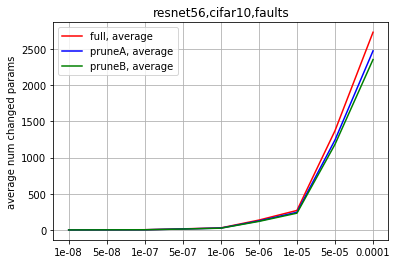

common_fault_rates 9 [1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001]
faults_results_list.shape: (3, 9, 20, 3)


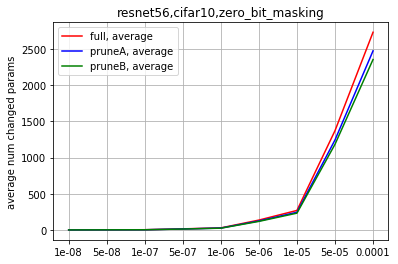

In [18]:
# compare full faults and prune faults results: #params changed 
for fault_type in fault_types:
    common_fault_rates = sorted(set(data['full'][fault_type].keys()).intersection(data['pruneA'][fault_type].keys()))
    print('common_fault_rates', len(common_fault_rates), common_fault_rates)

    # get the accuracy results
    faults_results_list = [] 
    for model_type in model_types:
        faults_results =  data[model_type][fault_type]
        faults_results_list.append([faults_results[fault_rate] for fault_rate in common_fault_rates])
    faults_results_list = np.asarray(faults_results_list)
    print('faults_results_list.shape:', faults_results_list.shape)


    averaged = np.average(faults_results_list, axis=2)
    x = range(len(common_fault_rates))
    colors = ['r', 'b', 'g']
    linestyles = ['-', '--', '-.']
    for i, model_type in enumerate(model_types):
        plt.plot(x, averaged[i, :, 1], linestyle=linestyles[0], color=colors[i], label=model_type+', average')

    plt.legend()
    plt.xticks(x, map(str, common_fault_rates))
    plt.grid()
    plt.ylabel('average num changed params')
    plt.title(model_name+','+dataset_name+','+fault_type)
    plt.show()

faults_results_list.shape: (2, 20, 3)


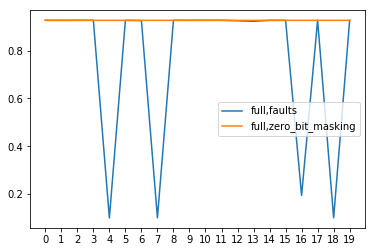

[(17, array([19.    , 19.    ,  0.9272]))]
[(4, array([14.    , 14.    ,  0.0996]))]
faults_results_list.shape: (2, 20, 3)


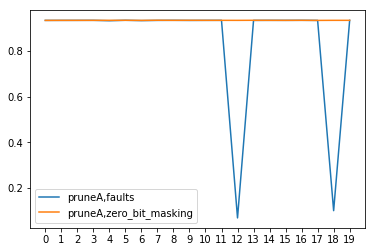

[(5, array([16.    , 16.    ,  0.9333]))]
[(12, array([19.    , 19.    ,  0.0699]))]
faults_results_list.shape: (2, 20, 3)


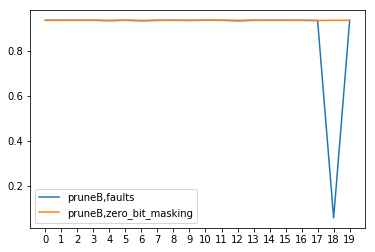

[(10, array([11.    , 11.    ,  0.9341]))]
[(18, array([7.    , 7.    , 0.0585]))]


In [22]:
# analyze bad model and good model using fault_rate=1e-08
fault_rate = 5e-07

# model_types = ['full', 'prune']
# fault_types = ['faults', 'zero_bit_masking']
example_trial_ids = {}
for model_type in model_types:

    faults_results_list = []
    legends = [] 
    for fault_type in fault_types:
        faults_results_list.append(data[model_type][fault_type][fault_rate])
        legends.append(model_type+','+fault_type)
        
    faults_results_list = np.asarray(faults_results_list)
    print('faults_results_list.shape:', faults_results_list.shape)
    num_trials = faults_results_list.shape[1]
    
    for i, fault_type in enumerate(fault_types):
        plt.plot(range(num_trials), faults_results_list[i, :, 2])
    plt.legend(legends)
    plt.xticks(range(num_trials), map(str, range(num_trials)))
    plt.show()

    # get the bad and good trial ids  
    example_trial_ids[model_type] = {'good': [np.argmax(faults_results_list[0, :, 2])],
                                    'bad': [np.argmin(faults_results_list[0, :, 2])]}

    print([(i, faults_results_list[0, i]) for i in example_trial_ids[model_type]['good']])
    print([(i, faults_results_list[0, i]) for i in example_trial_ids[model_type]['bad']])

In [29]:
import pickle 
def load_pickle(load_path, load_name=None, verbose=False):
    if load_name:
        filepath =  os.path.join(load_path, load_name)
    else:
        filepath = load_path 
    if verbose:
        print('Load pickle file:', filepath)
    return pickle.load( open(filepath, "rb" ))

def parse_stats(stats):
    # input format:
    # stats = {param_name: {value: [(flipped bit position, bit value after flip, value after flip)]}}
    # output format: 
    # param_name: #values changed,  #0 -> 1 bit flips, # 1-> 0 bit flips 
    param_stats = {} # key=param_name, value =dictionary
    for param_name, param_dict in stats.items():

        param_stats[param_name] = {'changed_params':0, 
                                   'flip_to_one': np.zeros(32), 
                                   'flip_to_zero': np.zeros(32),
                                  'value_before_flip': [],
                                  'value_after_flip':[], 
                                  'flipped_positions': []}
            
        for param_value, flip_list in param_dict.items():
            param_stats[param_name]['changed_params'] += 1
            param_stats[param_name]['value_before_flip'].append(round(param_value, 6))
            param_stats[param_name]['value_after_flip'].append(round(flip_list[-1][-1], 6))
            param_stats[param_name]['flipped_positions'].append([x[0] for x in flip_list])
            
            for flip_pos, flip_bit, flip_value in flip_list:
                if flip_bit:
                    param_stats[param_name]['flip_to_one'][flip_pos] += 1
                else:
                    param_stats[param_name]['flip_to_zero'][flip_pos] += 1
    return param_stats 

def trial_id_to_stats_files(trial_id):
    return str(trial_id)+'.pkl' 

def load_and_average_stats(results_dir, fault_rate, trial_ids):
    folder = str(fault_rate)
    stat_dir = os.path.join(results_dir, folder, 'stats')
    stats_files = map(trial_id_to_stats_files, trial_ids)
    avg_param_stats = None 
    for f in stats_files:
        # each trial is saved as a pickle 
        stats = load_pickle(stat_dir, f)
#         print stats
#         return 
        param_stats = parse_stats(stats)
        if avg_param_stats:
            for param_name, param_dict in param_stats.items():
                if param_name not in avg_param_stats:
                    avg_param_stats[param_name] = param_dict 
                else:
                    for key, value in param_dict.items():
                        avg_param_stats[param_name][key] += value 
        else:
            avg_param_stats = param_stats
    return avg_param_stats
                    

Number of variables: 167
conv/FC-0: [(0, (16, 3, 3, 3)), (1, (16,)), (2, (16,))]
conv/FC-1: [(3, (16, 16, 3, 3)), (4, (16,)), (5, (16,))]
conv/FC-2: [(6, (16, 16, 3, 3)), (7, (16,)), (8, (16,))]
conv/FC-3: [(9, (16, 16, 3, 3)), (10, (16,)), (11, (16,))]
conv/FC-4: [(12, (16, 16, 3, 3)), (13, (16,)), (14, (16,))]
conv/FC-5: [(15, (16, 16, 3, 3)), (16, (16,)), (17, (16,))]
conv/FC-6: [(18, (16, 16, 3, 3)), (19, (16,)), (20, (16,))]
conv/FC-7: [(21, (16, 16, 3, 3)), (22, (16,)), (23, (16,))]
conv/FC-8: [(24, (16, 16, 3, 3)), (25, (16,)), (26, (16,))]
conv/FC-9: [(27, (16, 16, 3, 3)), (28, (16,)), (29, (16,))]
conv/FC-10: [(30, (16, 16, 3, 3)), (31, (16,)), (32, (16,))]
conv/FC-11: [(33, (16, 16, 3, 3)), (34, (16,)), (35, (16,))]
conv/FC-12: [(36, (16, 16, 3, 3)), (37, (16,)), (38, (16,))]
conv/FC-13: [(39, (16, 16, 3, 3)), (40, (16,)), (41, (16,))]
conv/FC-14: [(42, (16, 16, 3, 3)), (43, (16,)), (44, (16,))]
conv/FC-15: [(45, (16, 16, 3, 3)), (46, (16,)), (47, (16,))]
conv/FC-16: [(48, (1

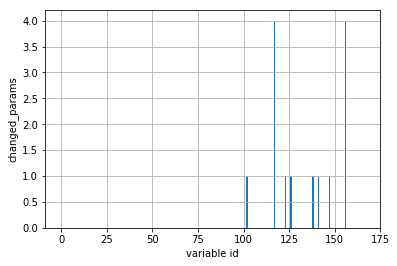

changed variables: [(102, (32, 32, 3, 3)), (117, (64, 64, 3, 3)), (123, (64, 64, 3, 3)), (126, (64, 64, 3, 3)), (138, (64, 64, 3, 3)), (141, (64, 64, 3, 3)), (147, (64, 64, 3, 3)), (156, (64, 64, 3, 3))]

fault_type:faults
(102, (32, 32, 3, 3)) [(0.013699, 0.01376, [15])]
(117, (64, 64, 3, 3)) [(0.047731, 0.095461, [8]), (-0.015334, -0.015334, [27]), (0.011047, 0.011047, [25]), (-0.031642, -0.0, [4])]
(123, (64, 64, 3, 3)) [(-0.024448, -0.024447, [22])]
(126, (64, 64, 3, 3)) [(0.017225, 0.0, [3])]
(138, (64, 64, 3, 3)) [(0.019858, 6.757281245299589e+36, [1])]
(141, (64, 64, 3, 3)) [(-0.041483, -0.057108, [9])]
(147, (64, 64, 3, 3)) [(-0.044151, -0.044136, [19])]
(156, (64, 64, 3, 3)) [(0.052464, 0.052464, [28]), (0.013964, 0.01372, [13]), (0.032094, 1.0920870768195007e+37, [1]), (-0.016112, -0.0, [4])]

fault_type:zero_bit_masking
(102, (32, 32, 3, 3)) [(0.013699, 0.013699, [15])]
(117, (64, 64, 3, 3)) [(0.047731, 0.047731, [8]), (-0.015334, -0.015334, [27]), (0.011047, 0.011047, [25])

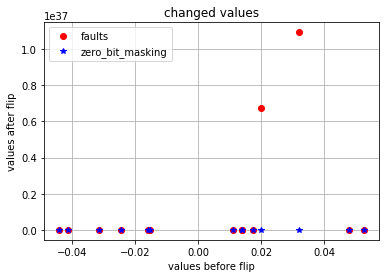

In [32]:
import functools 

model_type = 'full'
fault_type = 'faults'
results_dir = get_results_dir(model_name, dataset_name, model_type, fault_type)
avg_params_stats = load_and_average_stats(results_dir, fault_rate, example_trial_ids[model_type]['bad']) # bad trials

# plot the number of changed params for each variable
variables = sorted(avg_params_stats.keys(), key=lambda x: x[0])
print('Number of variables:', len(variables))
for layer_id in range(len(variables)//3):
    print('conv/FC-%d: %s' %(layer_id, variables[layer_id*3:(layer_id+1)*3]))


plt.bar(range(len(variables)), [avg_params_stats[var]['changed_params'] for var in variables])
plt.xlabel('variable id')
plt.ylabel('changed_params')
plt.grid()
plt.show()

changed_vars = [var for var in variables if avg_params_stats[var]['changed_params']]
print('changed variables:', changed_vars)

# compare value before flip and value after flip 
colors = ['r', 'b']
markers = ['o', '*']
for i, fault_type in enumerate(fault_types):
    print('\nfault_type:%s' %(fault_type))
    results_dir = get_results_dir(model_name, dataset_name, model_type, fault_type)
    avg_params_stats = load_and_average_stats(results_dir, fault_rate, example_trial_ids[model_type]['bad']) # bad trials

    for var in changed_vars:
        print(var, 
              list(zip(avg_params_stats[var]['value_before_flip'], 
               avg_params_stats[var]['value_after_flip'], 
               avg_params_stats[var]['flipped_positions'])))

    values_before = functools.reduce(lambda x, y: x+y, 
                                     [avg_params_stats[var]['value_before_flip'] for var in changed_vars])
    values_after = functools.reduce(lambda x, y: x+y, 
                                     [avg_params_stats[var]['value_after_flip'] for var in changed_vars])
    plt.plot(values_before, values_after, linestyle='', color=colors[i], marker=markers[i])
plt.xlabel('values before flip')
plt.ylabel('values after flip')
plt.title('changed values')
plt.legend(fault_types)
plt.grid()
plt.show()

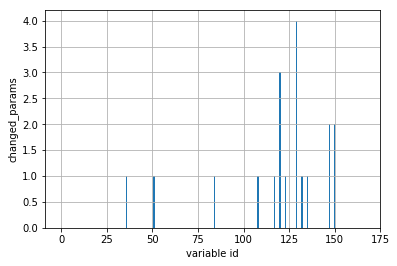

changed variables: [(36, (16, 14, 3, 3)), (51, (14, 16, 3, 3)), (84, (32, 28, 3, 3)), (108, (32, 28, 3, 3)), (117, (57, 64, 3, 3)), (120, (64, 57, 3, 3)), (123, (57, 64, 3, 3)), (129, (57, 64, 3, 3)), (132, (64, 57, 3, 3)), (135, (57, 64, 3, 3)), (147, (57, 64, 3, 3)), (150, (64, 57, 3, 3))]

fault_type:faults
(36, (16, 14, 3, 3)) [(-0.001261, -0.001261, [22])]
(51, (14, 16, 3, 3)) [(-0.046184, -0.061809, [9])]
(84, (32, 28, 3, 3)) [(7e-05, 7e-05, [28])]
(108, (32, 28, 3, 3)) [(-0.031805, -0.031805, [29])]
(117, (57, 64, 3, 3)) [(0.032035, 0.04766, [9])]
(120, (64, 57, 3, 3)) [(-0.055674, -0.0, [2]), (0.131037, 0.131037, [27]), (0.060332, 0.060328, [21])]
(123, (57, 64, 3, 3)) [(0.076409, 0.076897, [15])]
(129, (57, 64, 3, 3)) [(-0.064644, -0.064522, [17]), (0.017391, -0.017391, [0]), (0.098642, 0.098642, [31]), (-0.103974, -0.103974, [31])]
(132, (64, 57, 3, 3)) [(-0.072958, -0.072958, [28])]
(135, (57, 64, 3, 3)) [(0.009059, 3.082582092617092e+36, [1])]
(147, (57, 64, 3, 3)) [(-0.011

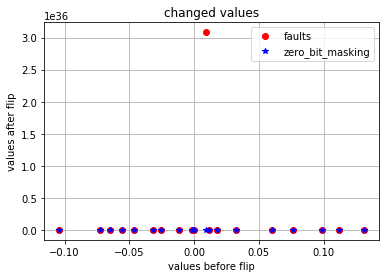

In [28]:
model_type = 'pruneA'
fault_type = 'faults'
results_dir = get_results_dir(model_name, dataset_name, model_type, fault_type)
avg_params_stats = load_and_average_stats(results_dir, fault_rate, example_trial_ids[model_type]['bad']) # bad trials

# plot the number of changed params for each variable
variables = sorted(avg_params_stats.keys(), key=lambda x: x[0])

plt.bar(range(len(variables)), [avg_params_stats[var]['changed_params'] for var in variables])
plt.xlabel('variable id')
plt.ylabel('changed_params')
plt.grid()
plt.show()


changed_vars = [var for var in variables if avg_params_stats[var]['changed_params']]
print('changed variables:', changed_vars)

# compare value before flip and value after flip 
colors = ['r', 'b']
markers = ['o', '*']
for i, fault_type in enumerate(fault_types):
    print('\nfault_type:%s' %(fault_type))
    results_dir = get_results_dir(model_name, dataset_name, model_type, fault_type)
    avg_params_stats = load_and_average_stats(results_dir, fault_rate, example_trial_ids[model_type]['bad']) # bad trials

    for var in changed_vars:
        print(var, 
              list(zip(avg_params_stats[var]['value_before_flip'], 
               avg_params_stats[var]['value_after_flip'], 
               avg_params_stats[var]['flipped_positions'])))

    values_before = functools.reduce(lambda x, y: x+y, 
                                     [avg_params_stats[var]['value_before_flip'] for var in changed_vars])
    values_after = functools.reduce(lambda x, y: x+y, 
                                     [avg_params_stats[var]['value_after_flip'] for var in changed_vars])
    plt.plot(values_before, values_after, linestyle='', color=colors[i], marker=markers[i])
plt.xlabel('values before flip')
plt.ylabel('values after flip')
plt.title('changed values')
plt.legend(fault_types)
plt.grid()
plt.show()